# Graham Algorithm (Convex Hull)

Our input data are points of plane S = {P=(P.x,P.y)}

In [1]:
__author__ = 'Konrad Bujak'

In [2]:
# Imports
from functools import reduce

## Importing the points

In [3]:
# Function that opens a file and generate from it tuples of coordinates
def get_coordinates(filename):
    f = open(filename)
    lines = f.readlines()
    lines = [item.rstrip("\n") for item in lines]
    new_list = list()
    for item in lines:
            item = item.split(",")
            item = tuple(float(items) for items in item)
            new_list.append(item)                
    f.close()
    return new_list

In [4]:
# List points will store our coordinates
points = get_coordinates("punktyPrzykladowe.csv")

In [5]:
def convex_hull_graham(points):
    '''
    Returns points on convex hull in CCW order according to Graham's scan algorithm. 
    '''
    TURN_LEFT, TURN_RIGHT, TURN_NONE = (1, -1, 0)

    def cmp(foo, bar):
        return (foo > bar) - (foo < bar)

    def turn(p1, p2, p):
        return cmp((p2[0] - p1[0])*(p[1] - p1[1]) - (p[0] - p1[0])*(p2[1] - p1[1]), 0)

    def _keep_left(hull, r):
        while len(hull) > 1 and turn(hull[-2], hull[-1], r) != TURN_LEFT:
            hull.pop()
        if not len(hull) or hull[-1] != r:
            hull.append(r)
        return hull

    # Sort points to chose the min
    points = sorted(points)
    # Apply the function keep_left to the list of points 
    # and store it as lists (thats why 3rd parameter is[])
    l = reduce(_keep_left, points, [])
    u = reduce(_keep_left, reversed(points), [])
    
    # Delete the starting point (min(points))
    #del l[0]
    
    # Add one more point to the list l or return the list
    return l.extend(u[i] for i in range(1, len(u) - 1)) or l

In [7]:
points_hull = convex_hull_graham(points)

In [43]:
def is_left(side_point, starting_point, ending_point):
    '''
    Implementation based on the instruction
    '''
    x1, y1 = side_point
    x2, y2 = starting_point
    x, y = ending_point
    d = (x - x1) * (y2 - y1) - (y - y1) * (x2 - x1)
    return d < 0

In [42]:
print(min(points))
print(sorted(points))

(1.722565176536662, 68.76793728176776)
[(1.722565176536662, 68.76793728176776), (5.7214666331244075, 134.06448155099957), (10.65339943129878, 98.85695948203514), (18.459942261153657, 82.1995251598949), (22.28994779995554, 93.88988271579822), (22.870720850111127, 105.06877141154881), (30.718251004590215, 118.0201901391825), (31.59807044587194, 89.38820546327446), (36.93711432433488, 154.03863772485442), (38.017240210251366, 107.25890066721361), (38.232695389770186, 93.00016702449155), (40.14093829158494, 80.31234243468163), (42.90840265383636, 91.94794916630826), (45.546467378618125, 106.80825428170337), (45.86410241739313, 106.33259702473887), (45.87863525331922, 20.661646399195064), (49.22746580876846, 41.00496110584578), (50.81925631013946, 127.61537733845984), (52.69814536955746, 45.64796987945456), (54.39552055432843, 109.44942011113275), (54.78497287731198, 164.81497234632374), (57.14402563258702, 88.96350081363218), (57.19857658932321, 72.41835168265371), (57.73916324766145, 65.3

## Visualization

In [9]:
import matplotlib
import matplotlib.pyplot as plt

In [14]:
def display():
        # all points
        x = [t[0] for t in points]
        y = [t[1] for t in points]
        plt.plot(x, y, marker='D', linestyle='None')

        # hull points
        hx = [t[0] for t in points_hull]
        hy = [t[1] for t in points_hull]
        plt.plot(hx, hy)

        plt.title('Convex Hull')
        return plt.show()

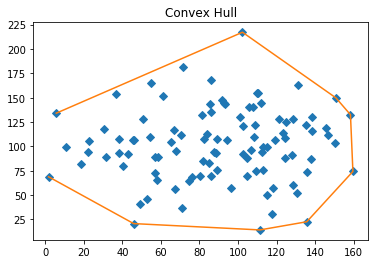

In [15]:
display()